The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Nr of Scales: 14
scales [2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522]
Nr of Scales: 14
scales [2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522]


/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:614: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_over('yellow')
/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:615: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_under('cyan')
/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:616: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, yo

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'y1-signal'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

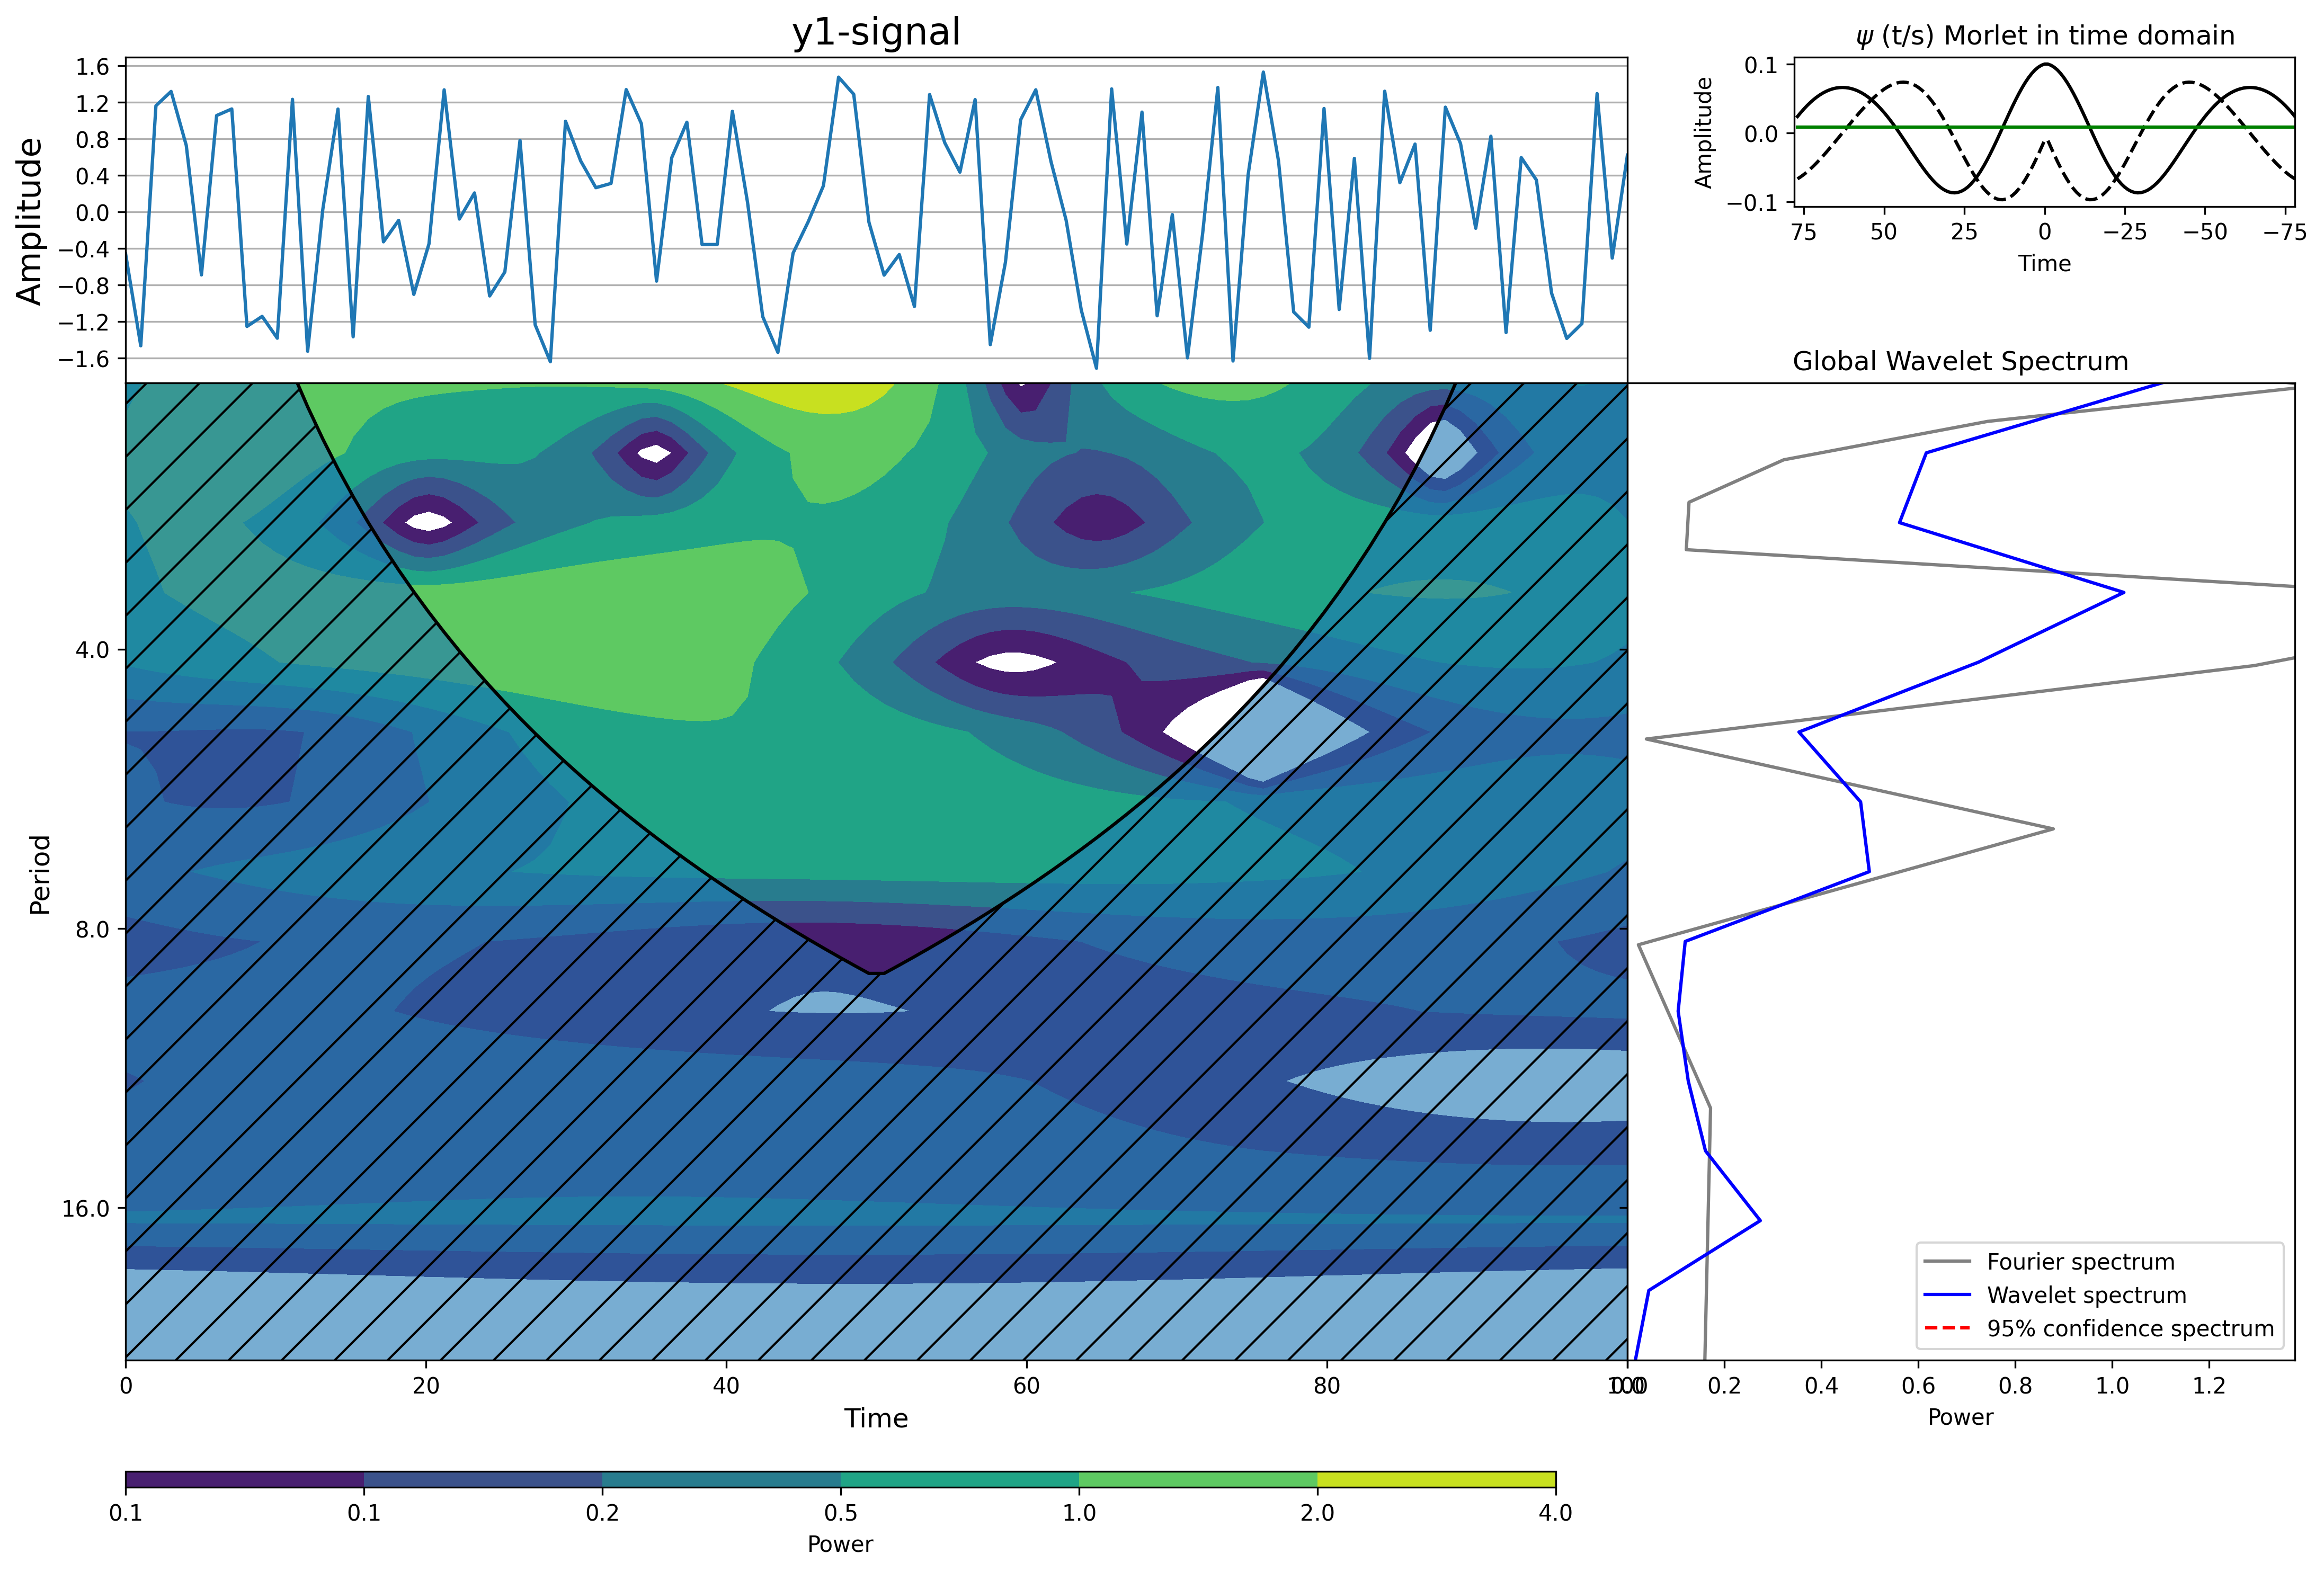

In [4]:
%load_ext autoreload
%autoreload 2
import waipy
import numpy as np

x = np.linspace(0,100,100)
y1 = np.random.rand(100)  # Generation of the Random Signal 1
y2 = np.random.rand(100)  # Generation of the Random Signal 2
#print x
data_norm = waipy.normalize(y1)
data_norm1 = waipy.normalize(y2)

dt =1
pad = 1         # pad the time series with zeroes (recommended)
dj = 0.25       # this will do 4 sub-octaves per octave
s0 = 2*dt       # this says start at a scale of 6 months if dt =annual
j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72     # lag-1 autocorrelation for red noise background
param = 6
mother = 'Morlet'
dt = 1/4.
dtmin = 0.25/8    # dt/n of suboctaves

result = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='x')
result1 = waipy.cwt(data_norm1, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='y')

waipy.wavelet_plot('y1-signal', x, data_norm, dtmin, result)






/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:614: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_over('yellow')
/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:615: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_under('cyan')
/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:616: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, yo

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'y2-signal'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

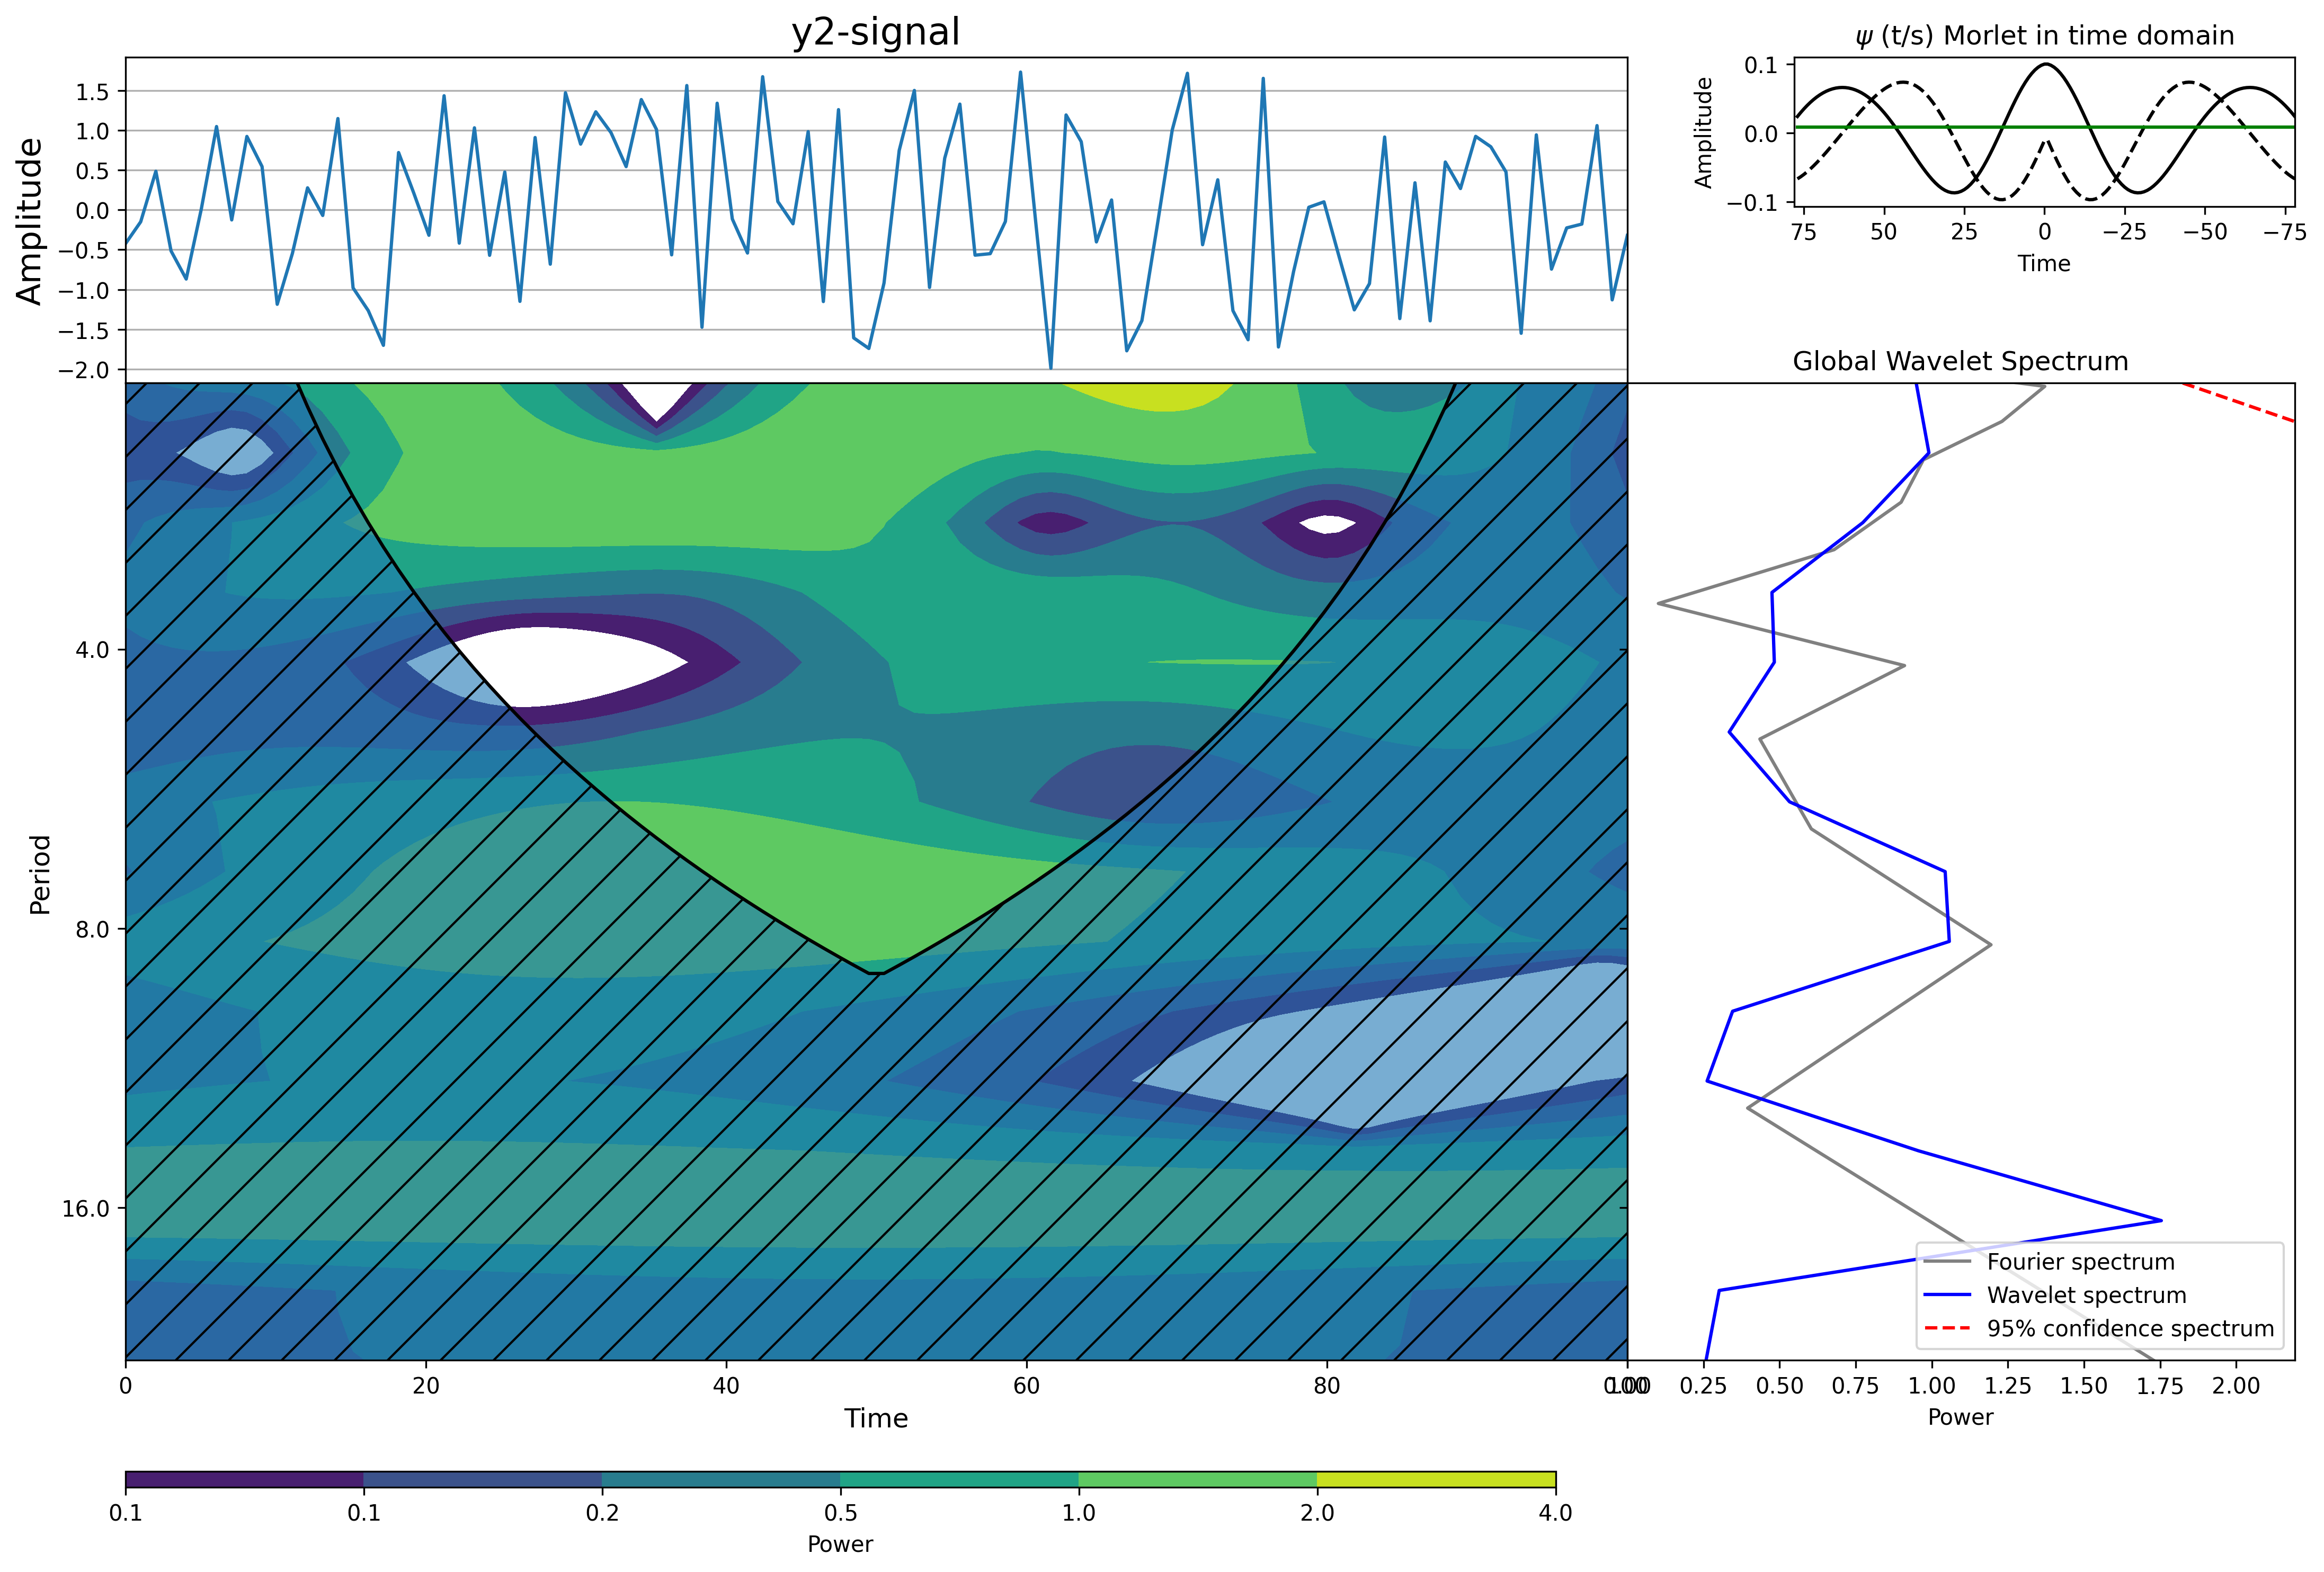

In [5]:
waipy.wavelet_plot('y2-signal', x, data_norm1, dtmin, result1)

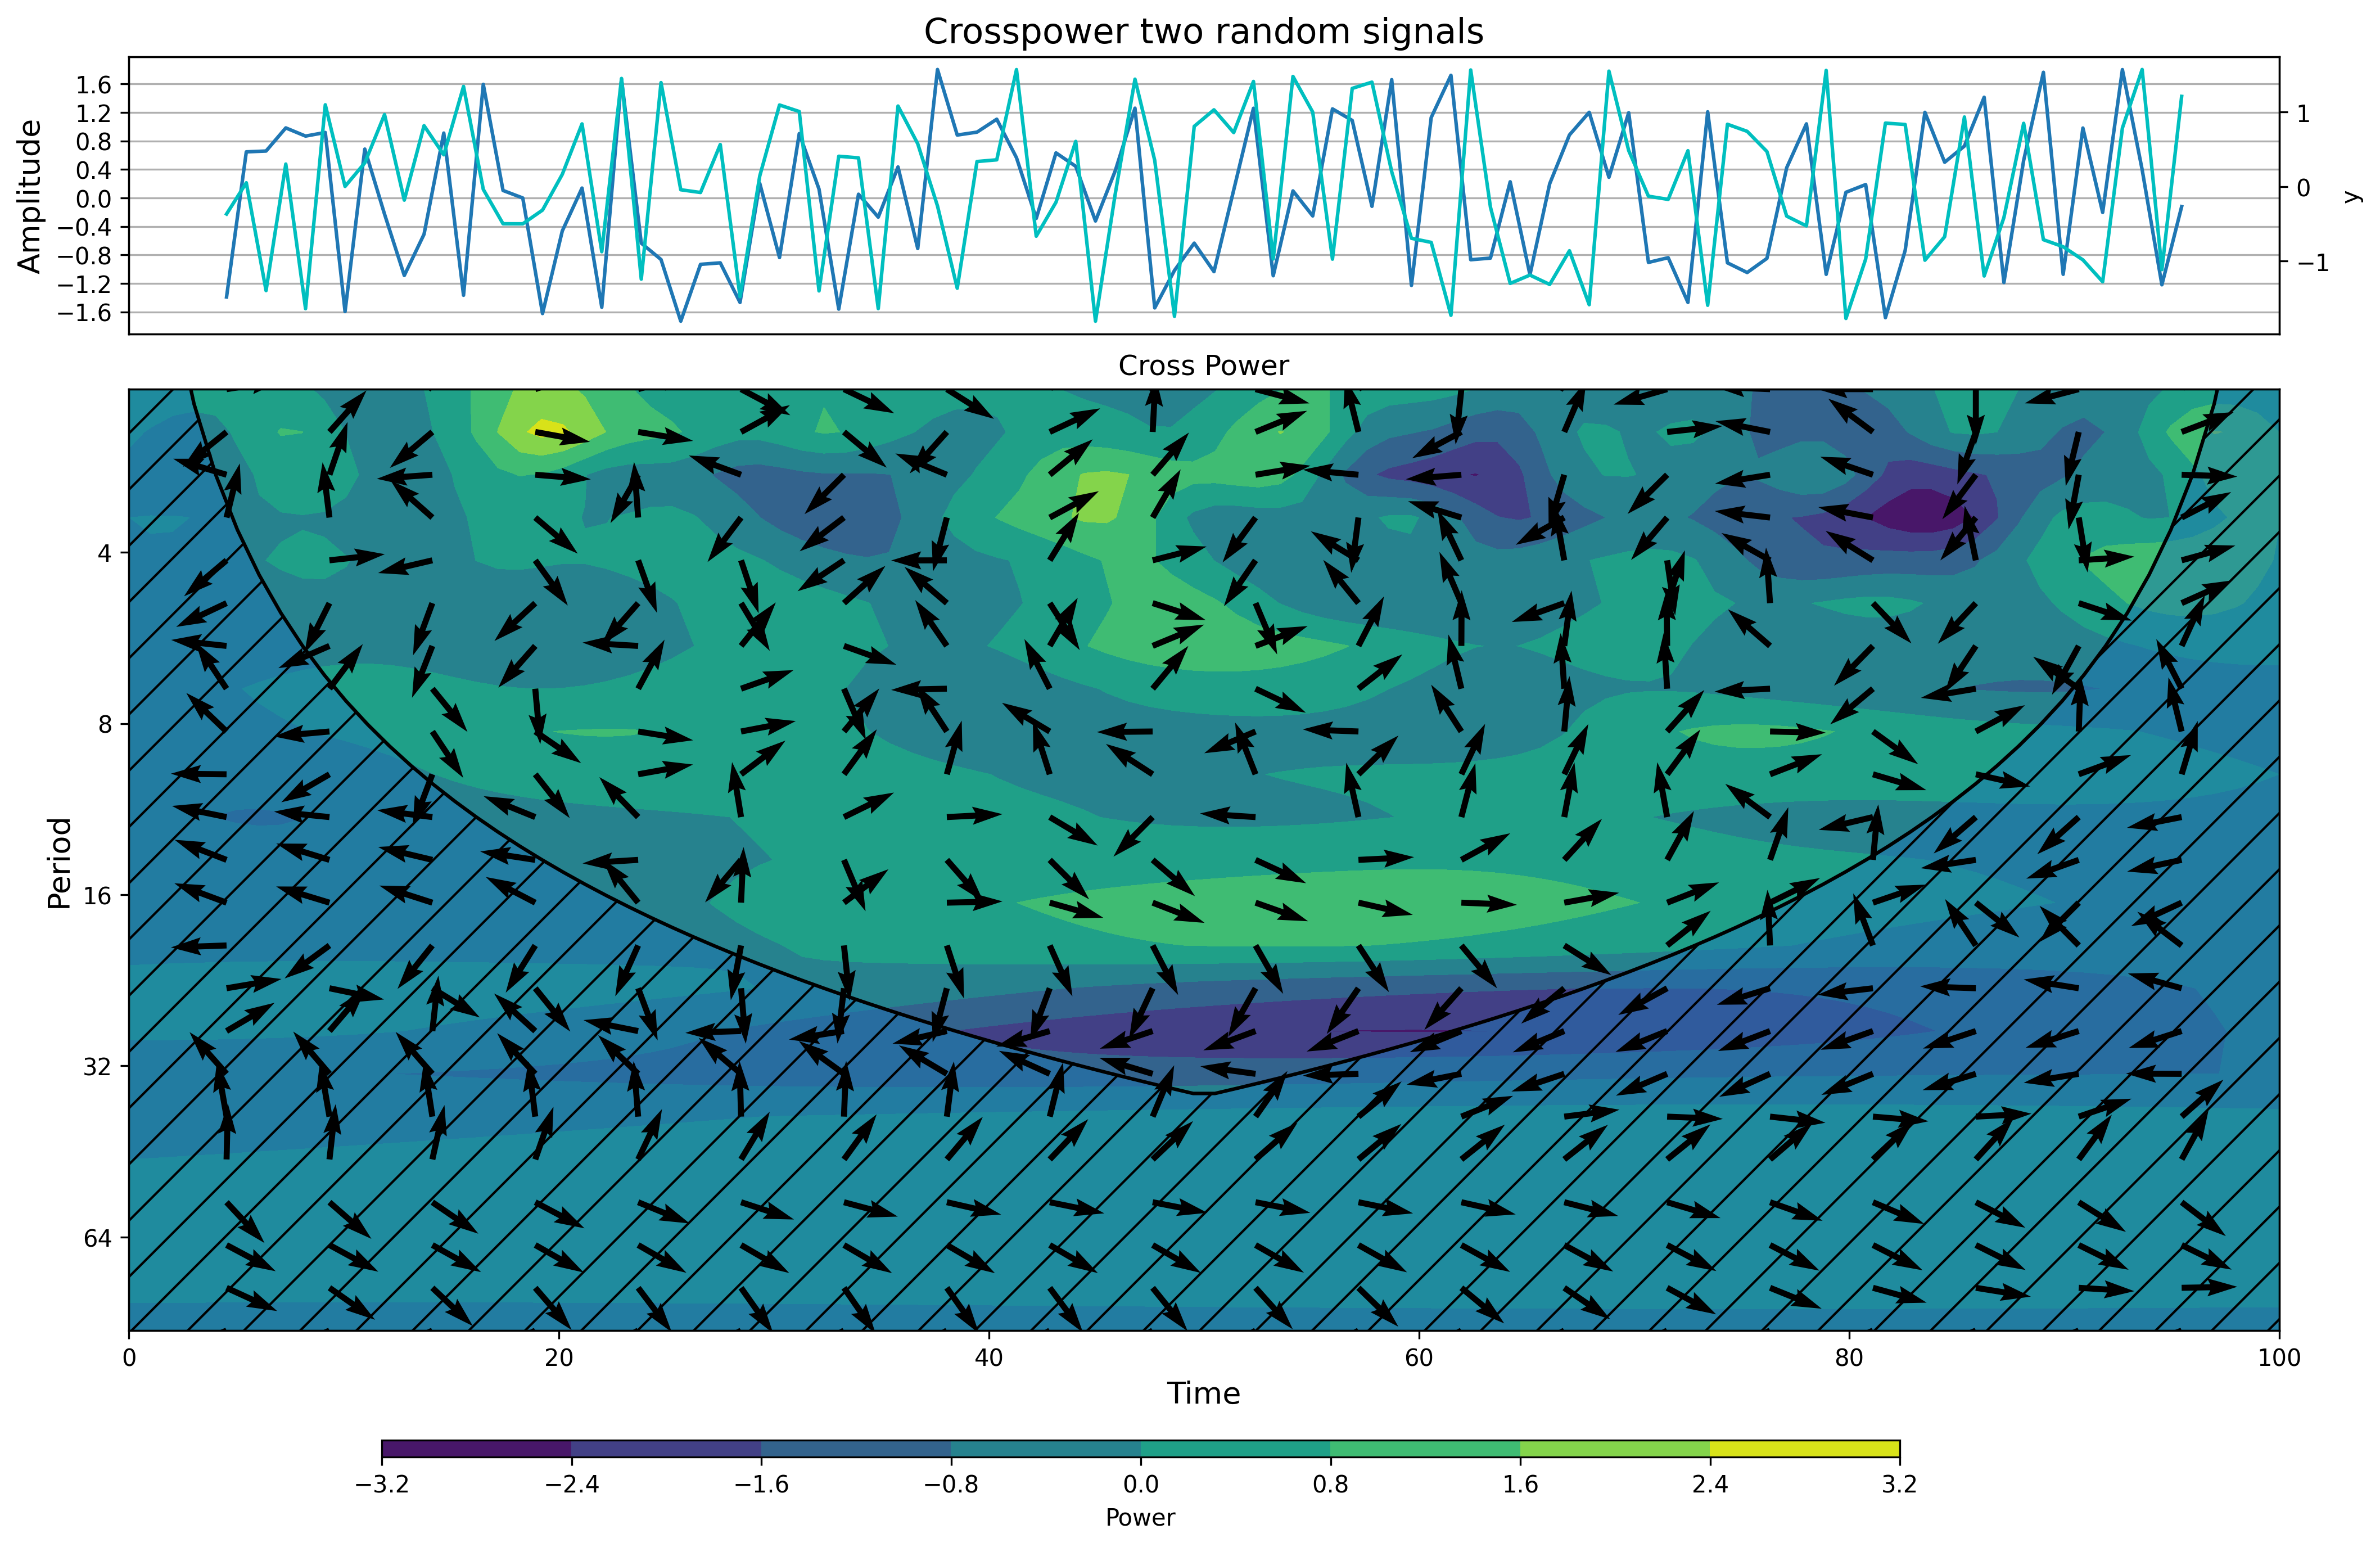

In [2]:
WPS12, coherence, phase_angle, cross_power = waipy.cross_wavelet(result['wave'], result1['wave'])
figname='example2.png'
waipy.plot_cross('Crosspower two random signals', cross_power, phase_angle, x, result, result1,figname)